## Step 1 
Read the file train.csv into Python and print a few rows.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/braulio/Documents/data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2
Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [5]:
df.groupby(['Survived']).count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df[['Embarked', 'Survived']].groupby(['Survived']).count()

,Embarked
Survived,
0,549
1,340


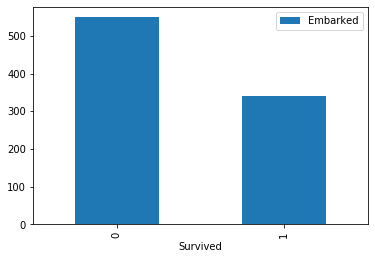

In [8]:
df[['Embarked', 'Survived']].groupby(['Survived']).count().plot.bar()

## Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [9]:
# df2 = first class passengers

df2 = df[df['Pclass'] == 1]

In [10]:
totalfc = df2['Embarked'].count()
totalfc

214

In [11]:
# df3 = first class passengers that survived

df3 = df2[df2['Survived'] == 1]
df3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


In [12]:
survfc = df3['Embarked'].count()
survfc

134

In [13]:
# proportion of surviving 1st class passengers with regards to the total number of 1st class passengers:

survfc/totalfc

0.6261682242990654

## Step 4
Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

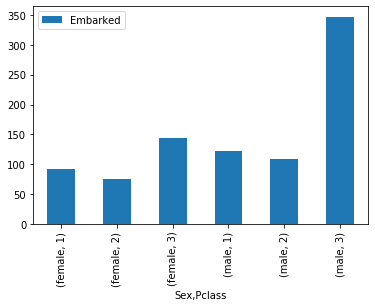

In [14]:
df[['Embarked', 'Sex', 'Pclass']].groupby(['Sex', 'Pclass']).count().plot.bar()

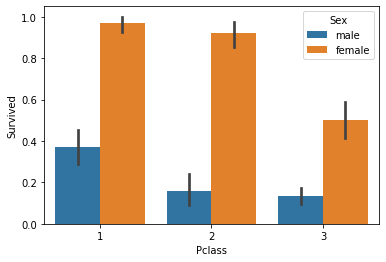

In [17]:
# drawn with seaborn for better visualization
sns.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')

## Step 5
Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

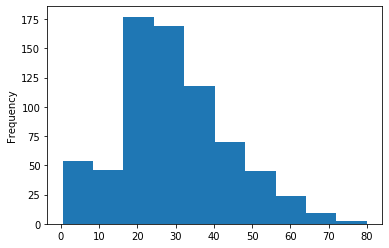

In [21]:
df['Age'].plot.hist()

In [22]:
# df1 = all survivors
df1 = df[df['Survived'] == 1]

# df0 = all non survivors
df0 = df[df['Survived'] == 0]

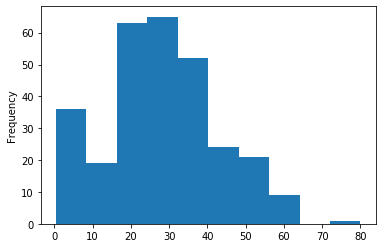

In [27]:
df1['Age'].plot.hist()

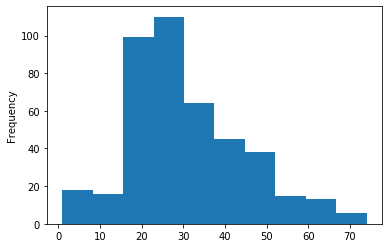

In [28]:
df0['Age'].plot.hist()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


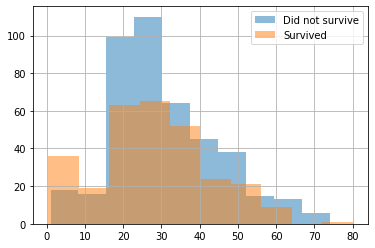

In [30]:
# for better visualization:

ax1=df[df["Survived"]==0]["Age"].hist(alpha=0.5)
ax2=df[df["Survived"]==1]["Age"].hist(alpha=0.5)
plt.legend([ax1, ax2], labels=["Did not survive", "Survived"])

## Step 6
Calculate the average age for survived and drowned passengers separately.

In [31]:
df1['Age'].mean()

# Average age for survivors

28.343689655172415

In [32]:
df0['Age'].mean()

# Average age for drowned passengers

30.62617924528302

## Step 7
Replace missing age values by the mean age.

In [39]:
# calculate mean age.
mean_age = df['Age'].mean()
mean_age

# fill in NaNs

df_c = df['Age'].fillna(mean_age)
df_c

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

## Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [40]:
df[['Embarked', 'Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex', 'Survived']).count()

Embarked
Pclass Sex    Survived          
1      female 0                3
              1               89
       male   0               77
              1               45
2      female 0                6
              1               70
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47

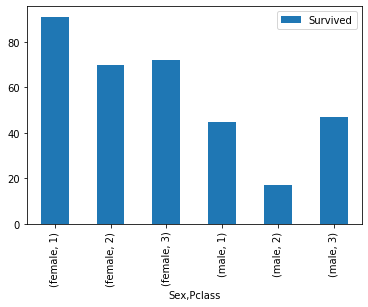

In [41]:
# df1 = all survivors

df4 = df1[['Sex', 'Pclass', 'Survived']]

df4.groupby(['Sex', 'Pclass']).count().plot.bar()